# Example User

In [2]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import nxpd
from functools import reduce

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v
import features as f

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [3]:
# Load and preprocess data
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')

In [4]:
# Load graph objects
otc_G = h.build_graph(otc_df)
otc_pos_G = h.build_graph(otc_df, rating_type='pos')

In [5]:
# Load Data
df_historical_target = pd.read_csv('../data/historical_target_features.csv')
df_historical_source = pd.read_csv('../data/historical_source_features.csv')
df_graph_target = pd.read_csv('../data/graph_target_features.csv')    
df_graph_source = pd.read_csv('../data/graph_source_features.csv')     

In [6]:
def subset_mask(df_historical, type):
    if type == 'fraud':
        return df_historical[(df_historical['num_neg_received']==0) & 
                             (df_historical['num_pos_received']>=3) & 
                             ((df_historical['rating']>0) | (df_historical['rating']==-10))]    
    elif type == 'suspicious':
        return df_historical[(df_historical_target['num_neg_received']==0) & 
                             (df_historical_target['num_pos_received']>=3) &
                             (df_historical['rating']>-10)]    
    elif type == 'all':
        return df_historical[(df_historical_target['num_neg_received']==0) & 
                             (df_historical_target['num_pos_received']>=3)]
    else:
        return df_historical

In [7]:
mask = subset_mask(df_historical_target, "none")
merge_cols = ['ratee','rater','date','rating']

df_gs = f.normalize_source_graph_metrics(df_graph_source)
df_gt = f.normalize_target_graph_metrics(df_graph_target)

df_gt.drop(['color', 'penwidth'], inplace=True, axis=1)
df_gs.drop(['color', 'penwidth'], inplace=True, axis=1)
df_historical_target.drop(['color', 'penwidth'], inplace=True, axis=1)
df_historical_source.drop(['color', 'penwidth'], inplace=True, axis=1)

df_lst = [df_historical_target, df_historical_source]
df_hh = reduce(lambda left,right: pd.merge(left,right,on=merge_cols), df_lst)
df_hh = df_hh[df_hh.index.isin(mask.index)]

df_lst = [df_gt, df_gs]
df_g = reduce(lambda left,right: pd.merge(left,right,on=merge_cols), df_lst)
df_gg = f.graph_metrics_source_target_difference(df_g)
df_gg = df_gg[df_gg.index.isin(mask.index)]

df_lst= [df_hh, df_gg]
df_all = reduce(lambda left,right: pd.merge(left,right,on=merge_cols), df_lst)  

## Project Example

In [21]:
import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v
import features as f
arr = f.graph_user_features(otc_df, 1973, '2012-04-26 00:17:47')

In [23]:
graph_target_features = ['target_triad_300',
                            'target_triad_210',
                            'target_triad_120',
                            'target_triad_030T',
                            'target_triad_030C',
                            'target_triad_201',
                            'target_triad_111',
                            'target_triad_102',
                            'target_triad_021',
                            'target_triad_all',
                            'target_cluster_coef',
                            'target_neighbors',
                            'target_betweeness',
                            'target_excess_ratings_in']

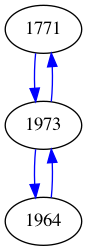

In [11]:
otc_pos_G = h.build_graph(otc_df, rating_type='pos', rating_date='2012-04-26 01:17:56')
user = 1973
user_g = nx.ego_graph(nx.reverse_view(otc_pos_G), user, radius=1)
node_census = nx.triadic_census(nx.reverse_view(user_g))
degree = nx.degree(nx.reverse_view(user_g))
user_g.graph['rankdir']='TB'
nxpd.draw(nx.reverse_view(user_g), show='ipynb')


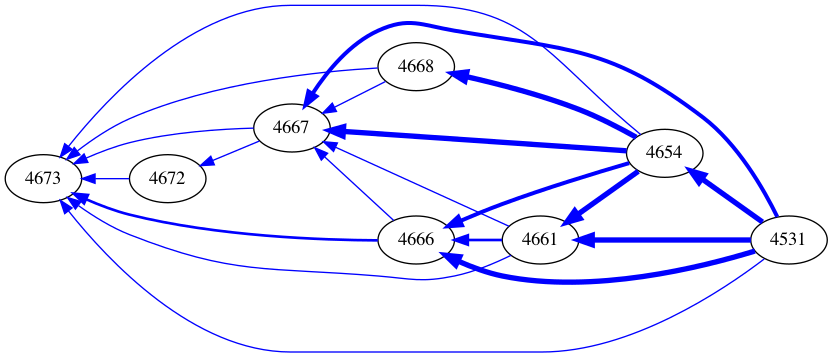

In [26]:
user_g2 = nx.reverse_view(user_g)
user_g2.graph['rankdir']='RL'
nxpd.draw(user_g2, show='ipynb')

In [22]:
nx.triadic_census(user_g)

{'003': 3,
 '012': 10,
 '102': 0,
 '021D': 11,
 '021U': 2,
 '021C': 6,
 '111D': 0,
 '111U': 0,
 '030T': 24,
 '030C': 0,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

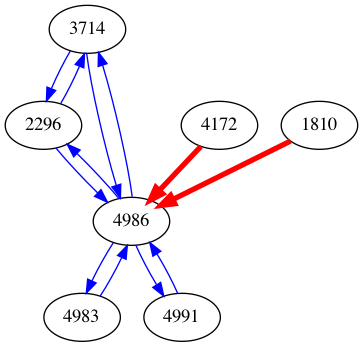

In [113]:
user = 4986
user_g = nx.ego_graph(otc_pos_G, user, radius=1)
user_g.graph['rankdir']='TB'
user_g.add_edges_from([(4172,4986), (1810,4986)], color='red', penwidth=4)
nxpd.draw(user_g, show='ipynb')

### Example of normal legitimate interaction

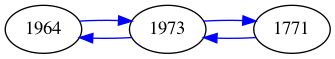

In [14]:
user = 1973
otc_pos_G = h.build_graph(otc_df, rating_type='pos', rating_date='2012-04-26 01:17:56')

user_g = nx.ego_graph(otc_pos_G, user, radius=1)
user_g.graph['rankdir']='RL'
nxpd.draw(user_g, show='ipynb')

### Example of collusion fraud

In [ ]:
# Example 1
example_user = X[(features_df['ratee']==4986)].copy()
preds = RF.predict_proba(example_user)[:,1]
example_user['prediction'] = preds
example_user.to_csv()

In [ ]:
#Example 2
example_user = X[(features_df['ratee']==4524)].copy()
preds = RF.predict_proba(example_user)[:,1]
example_user['prediction'] = preds
example_user[:10]

## example of 030T

In [14]:
user = 4733
df_all[(df_all['date']<='2013-08-13 01:14:22') & ((df_all['ratee']==user) | (df_all['rater']==user))][['rater','ratee','rating','date','030T_norm_target']]

,rater,ratee,rating,date,030T_norm_target
26124,4688,4733,1,2013-08-13 01:05:43,0.000000
26125,4686,4733,1,2013-08-13 01:06:33,0.000000
26126,4682,4733,3,2013-08-13 01:07:03,0.500000
26127,4683,4733,1,2013-08-13 01:07:45,1.333333
26128,4681,4733,10,2013-08-13 01:08:26,1.750000
26129,4680,4733,10,2013-08-13 01:08:58,2.400000
26130,4679,4733,5,2013-08-13 01:09:25,2.833333
26131,4678,4733,1,2013-08-13 01:09:51,3.142857
26132,4676,4733,4,2013-08-13 01:10:29,3.375000
26134,4667,4733,1,2013-08-13 01:11:03,3.222222


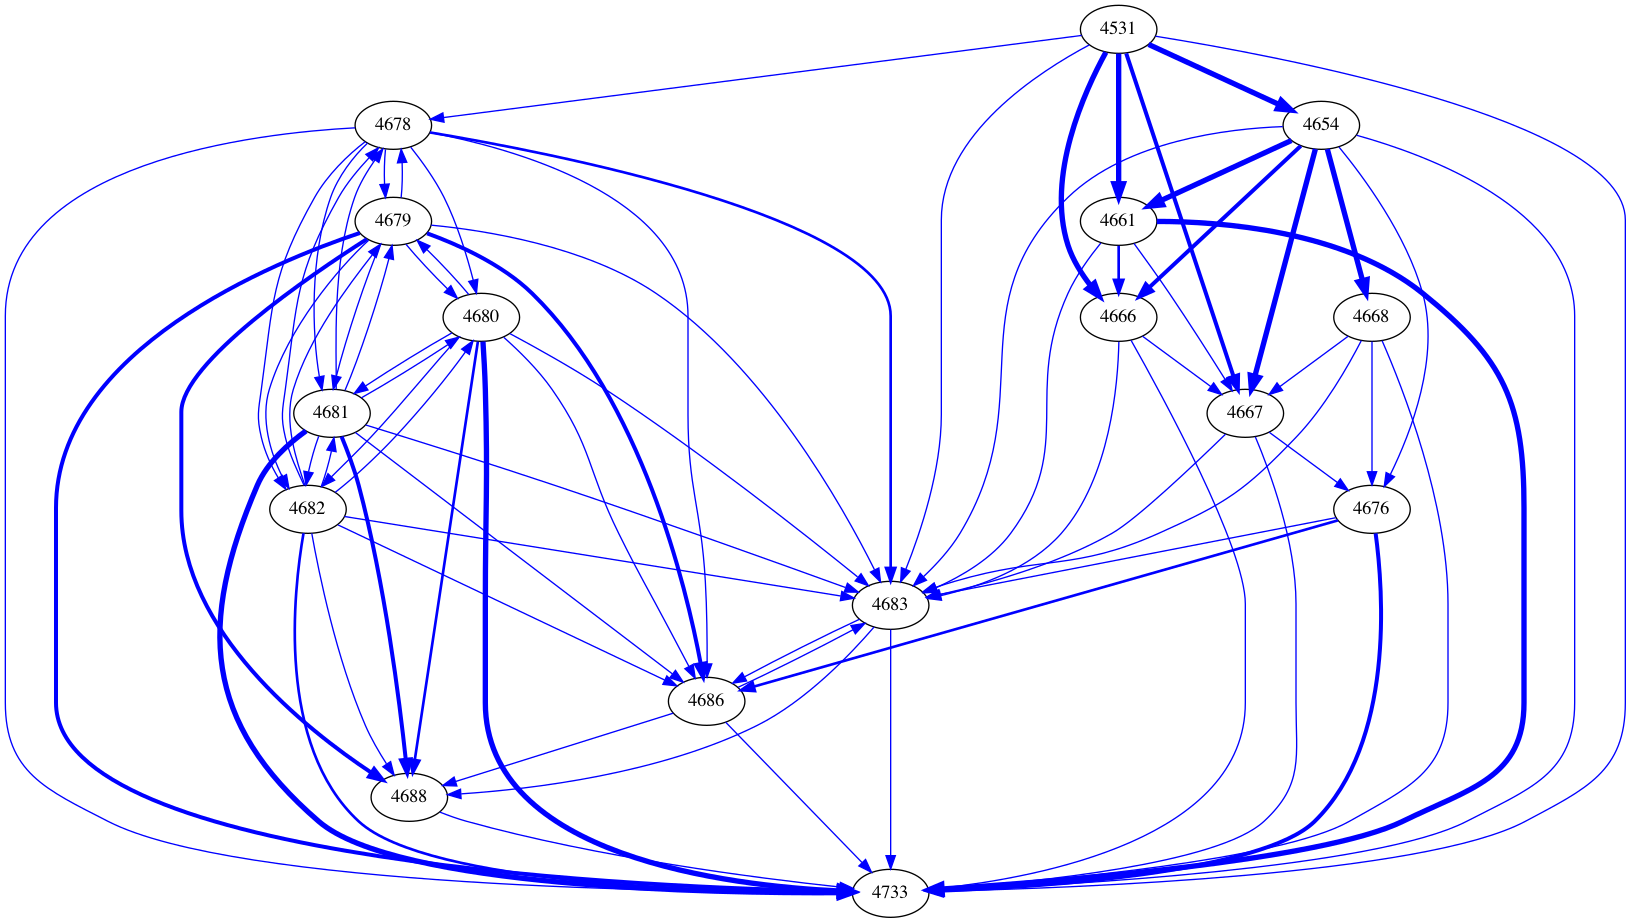

In [56]:
user = 4733
# added
user_g = nx.ego_graph(nx.reverse_view(otc_pos_G), user, radius=1)
user_g = nx.reverse_view(user_g)
user_g.graph['rankdir']='TB'
nxpd.draw(user_g, show='ipynb')

#otc_pos_G = h.build_graph(otc_df, rating_type='pos', rating_date='2012-04-26 01:17:56')


In [10]:
user = 4688
df_all[(df_all['date']< '2013-08-06 10:45:07') & ((df_all['ratee']==user) | (df_all['rater']==user))][['rater','ratee','rating','date','030T_norm_target']]

,rater,ratee,rating,date,030T_norm_target
25789,4686,4688,1,2013-08-06 10:19:50,0.000000
25790,4682,4688,1,2013-08-06 10:20:33,0.000000
25791,4683,4688,1,2013-08-06 10:21:21,0.500000
25792,4681,4688,5,2013-08-06 10:22:03,0.666667
25793,4680,4688,3,2013-08-06 10:22:40,1.000000
25794,4679,4688,6,2013-08-06 10:23:13,1.200000
25802,4458,4688,-10,2013-08-06 10:36:30,1.333333
